<a href="https://colab.research.google.com/github/skagnihotri/urban_sound_classification/blob/master/sound_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('/content/drive/My Drive/urban sound dataset/ content UrbanSound8K metadata UrbanSound8K.csv')

In [4]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
X_train = pd.read_csv('/content/drive/My Drive/urban sound dataset/ content train_data.csv')
X_test = pd.read_csv('/content/drive/My Drive/urban sound dataset/ content test_data.csv')
y_train = pd.read_csv('/content/drive/My Drive/urban sound dataset/ content train_labels.csv')
y_test = pd.read_csv('/content/drive/My Drive/urban sound dataset/ content test_labels.csv')

In [6]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_test.shape, y_test.shape

((836, 6960), (836, 1))

In [7]:
X_train = X_train.reshape((X_train.shape[0], 40, 174, 1))
X_test = X_test.reshape((X_test.shape[0], 40, 174, 1))

X_train.shape, X_test.shape

((7894, 40, 174, 1), (836, 40, 174, 1))

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train)
y_test = onehot.transform(y_test)
y_train.shape, y_test.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


((7894, 10), (836, 10))

# CNN Model

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Input, BatchNormalization, Dense, concatenate

In [0]:
# model
input = Input(shape= (40, 174, 1))

In [0]:
batch_nrml1 = BatchNormalization() (input)
conv1 = Conv2D(filters= 32, kernel_size= (3,3), strides= 1, padding= "same", activation= "relu") (batch_nrml1)
pool1 = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv1)

In [0]:
# branch A
batch_nrml1_A = BatchNormalization() (pool1)
conv1_A = Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding= "same", activation= "relu") (batch_nrml1_A)
pool1_A = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv1_A)
batch_nrml2_A = BatchNormalization() (pool1_A)
conv2_A = Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding= "same", activation= "relu") (batch_nrml2_A)
pool2_A = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv2_A)
flatten_A = Flatten() (pool2_A)

In [0]:
# branch B
batch_nrml1_B = BatchNormalization() (pool1)
conv1_B = Conv2D(filters= 64, kernel_size= (5, 5), strides= 1, padding= "same", activation= "relu") (batch_nrml1_B)
pool1_B = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv1_B)
batch_nrml2_B = BatchNormalization() (pool1_B)
conv2_B = Conv2D(filters= 64, kernel_size= (5, 5), strides= 1, padding= "same", activation= "relu") (batch_nrml2_B)
pool2_B = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv2_B)
flatten_B = Flatten() (pool2_B)

In [0]:
# branch C
batch_nrml1_C = BatchNormalization() (pool1)
conv1_C = Conv2D(filters= 64, kernel_size= (7, 7), strides= 1, padding= "same", activation= "relu") (batch_nrml1_C)
pool1_C = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv1_C)
batch_nrml2_C = BatchNormalization() (pool1_C)
conv2_C = Conv2D(filters= 64, kernel_size= (7, 7), strides= 1, padding= "same", activation= "relu") (batch_nrml2_C)
pool2_C = MaxPooling2D(pool_size= (2, 2), strides= 2, padding= "same") (conv2_C)
flatten_C = Flatten() (pool2_C)

In [0]:
conc = concatenate(inputs= [flatten_A, flatten_B, flatten_C])

In [0]:
hidden1 = Dense(units= 200, activation= "relu") (conc)
drop1 = Dropout(rate = 0.4) (hidden1)
hidden2 = Dense(units= 100, activation= "relu") (drop1)
drop2 = Dropout(rate = 0.3) (hidden2)

In [0]:
output = Dense(units= 10, activation= 'softmax') (drop2)

In [0]:
model = Model(inputs = [input], outputs = [output])

In [77]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 40, 174, 1)] 0                                            
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 40, 174, 1)   4           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 40, 174, 32)  320         batch_normalization_11[0][0]     
__________________________________________________________________________________________________
max_pooling2d_19 (MaxPooling2D) (None, 20, 87, 32)   0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [0]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [79]:
model.layers

In [80]:
history = model.fit(X_train, y_train, batch_size= 32, epochs= 50, validation_split= 0.2)

Train on 6315 samples, validate on 1579 samples
Epoch 1/50
6315/6315 [==============================] - 18s 3ms/sample - loss: 2.4477 - acc: 0.2511 - val_loss: 2.0990 - val_acc: 0.2514
Epoch 2/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 1.7360 - acc: 0.3539 - val_loss: 1.8630 - val_acc: 0.3952
Epoch 3/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 1.5379 - acc: 0.4204 - val_loss: 1.9880 - val_acc: 0.3559
Epoch 4/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 1.3353 - acc: 0.4939 - val_loss: 1.6841 - val_acc: 0.3908
Epoch 5/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 1.0940 - acc: 0.5937 - val_loss: 1.6783 - val_acc: 0.4630
Epoch 6/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 0.9449 - acc: 0.6606 - val_loss: 1.7109 - val_acc: 0.5117
Epoch 7/50
6315/6315 [==============================] - 17s 3ms/sample - loss: 0.8110 - acc: 0.7208 - val_loss: 1.6512 - val_acc: 

In [81]:
model.evaluate(X_test, y_test)

836/836 [==============================] - 1s 943us/sample - loss: 1.5964 - acc: 0.7189


[1.5964397615045711, 0.71889955]

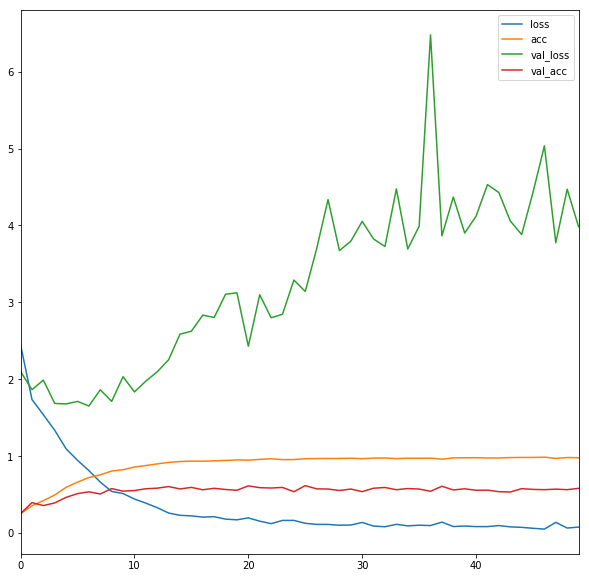

In [82]:
pd.DataFrame(history.history).plot(figsize=(10,10))